In [1]:
## import essential modules 
import qumcmc 
from qumcmc.basic_utils import *
from qumcmc.energy_models import *

from qumcmc.classical_mcmc_routines import classical_mcmc
# from qumcmc.quantum_mcmc_routines_qiskit import quantum_enhanced_mcmc   #for qiskit Aer's Simulator backend 
# from qumcmc.quantum_mcmc_routines_qulacs import quantum_enhanced_mcmc   #for qulacs backend (**faster)
from QuantumSamplingRoutines_s import *
from qumcmc.trajectory_processing import calculate_running_js_divergence, calculate_running_kl_divergence, calculate_runnning_magnetisation, get_trajectory_statistics

import pickle, json 
import networkx as nx

#### DEFINE MODEL

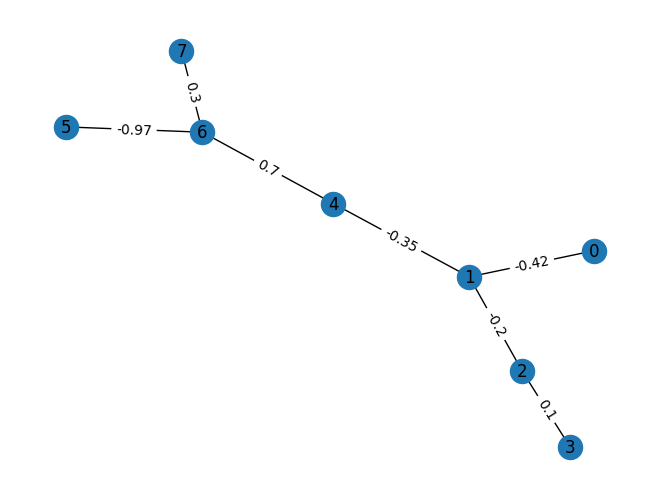

In [2]:
node_to_qubit_map = {0: 0, 1:1, 2:2, 3:3, 4:4, 5:6, 6:7, 7: 10}
qubit_to_node_map = dict([(item[1], item[0]) for item in node_to_qubit_map.items()])

map_node_to_qubit = lambda x: node_to_qubit_map[x]
map_qubit_to_node = lambda x: qubit_to_node_map[x]

device_nodes = [0,1,2,3,4,6,7,10]
device_edges = [(0,1),(1,4),(4,7),(7,10),(7,6),(1,2),(2,3)]

graph_nodes = [0,1,2,3,4,5,6,7]

graph_edges = []
for edge in device_edges:
    i = map_qubit_to_node(edge[0])
    j = map_qubit_to_node(edge[1])
    new_edge = (i,j)
    graph_edges.append(new_edge)
    
trial_graph = nx.Graph(name= "ising_1")
trial_graph.add_nodes_from(graph_nodes)
trial_graph.add_edges_from(graph_edges)

h = [0.1, 0.3, 0.4, 0.21, 0.38, 0.15, 0.25, 0.10]
node_attr = {}
for index, node in enumerate(trial_graph.nodes) :

    node_attr[node] = {'h': np.round(h[index] * np.random.choice([1, -1]), 2)}

nx.set_node_attributes(trial_graph, node_attr)
edge_attr = {}
for edge in trial_graph.edges :
    edge_attr[edge] = {'J': np.round(np.random.uniform(-1,1),2)}

nx.set_edge_attributes(trial_graph, edge_attr)
pos = nx.spring_layout(trial_graph)
nx.draw(trial_graph, pos, with_labels= True,)
nx.draw_networkx_edge_labels(trial_graph, pos, edge_labels= nx.get_edge_attributes(trial_graph, 'J'));

In [3]:
def build_energy_function_from_graph(graph: nx.Graph, name:str = 's'):
    
    nspins = graph.number_of_nodes()
    j = nx.get_edge_attributes(graph, 'J')
    J = np.zeros((nspins, nspins))

    for edge in graph.edges():
        J[edge[0], edge[1]] = j[edge]
        J[edge[1], edge[0]] = j[edge]

    H = list(nx.get_node_attributes(graph, 'h').values())    

    return IsingEnergyFunction(J =J, h=H, name= 'sm1')


            MODEL : sm1
Non-zero Interactions (J) : 7 / 28
Non-zero Bias (h) : 8 / 8
---------------------------------------------
Average Interaction Strength <|J|> :  0.09499999999999999
Average Bias Strength <|h|>:  0.23625000000000002
alpha :  1.8207039610690152
---------------------------------------------


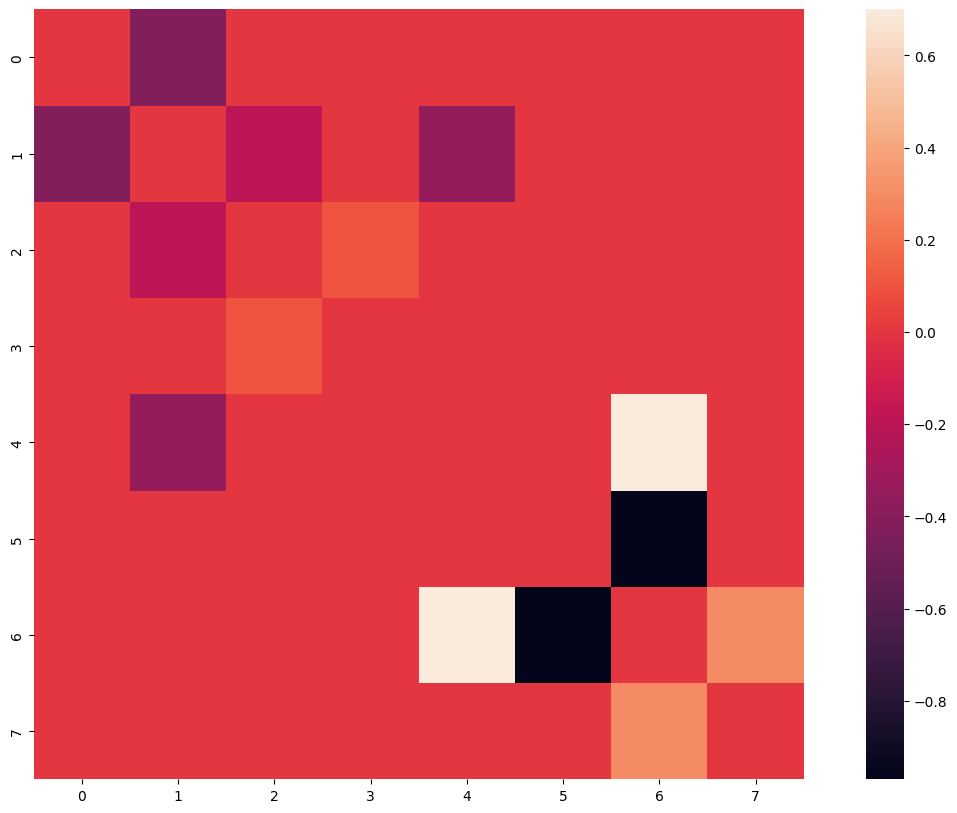

In [4]:

model = build_energy_function_from_graph(trial_graph, name= 'ising_exp')
model.model_summary()

#### DEFINE SAMPLING ROUTINE

In [5]:
sampling_job = QuantumSamplingJob(model)

#### MAIN DATACOLLECTING LOOP

In [6]:
gamma_values = list(np.linspace(0.26,0.6,9) )
time_values = 0.8 * np.arange(2,12)

In [7]:
# gamma_values = np.linspace(0.26,0.6,9) ;
  ## 9x10 circuits = 90, times 3 for SPAM twirling
all_params = []
for gamma in gamma_values:
    for time in time_values:
        all_params.append((gamma,time))

for gamma,time in all_params:
  sampling_job.sample_tranistion_matrix(gamma, time, num_shots= 2**(2*model.num_spins))

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)
/home/pafloxy/Documents/qhack-project-raflaneq/qumcmc/prob_dist.py:27: RuntimeWarning: invalid value encountered in scalar divide
  self[k] = self[k] / r_sum


In [8]:
with open('DATA/transition-data/sm1.pickle', 'rb') as hl:
    result = pickle.load(hl)

In [11]:
result['00000000'].values()

dict_values([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

In [9]:
def build_matrix_from_dict(dict:dict)

{'00000000': {'00000000': 0.0,
  '00000001': 0.0,
  '00000010': 0.0,
  '00000011': 0.0,
  '00000100': 0.0,
  '00000101': 0.0,
  '00000110': 0.0,
  '00000111': 0.0,
  '00001000': 0.0,
  '00001001': 0.0,
  '00001010': 0.0,
  '00001011': 0.0,
  '00001100': 0.0,
  '00001101': 0.0,
  '00001110': 0.0,
  '00001111': 0.0,
  '00010000': 0.0,
  '00010001': 0.0,
  '00010010': 0.0,
  '00010011': 0.0,
  '00010100': 0.0,
  '00010101': 0.0,
  '00010110': 0.0,
  '00010111': 0.0,
  '00011000': 0.0,
  '00011001': 0.0,
  '00011010': 0.0,
  '00011011': 0.0,
  '00011100': 0.0,
  '00011101': 0.0,
  '00011110': 0.0,
  '00011111': 0.0,
  '00100000': 0.0,
  '00100001': 0.0,
  '00100010': 0.0,
  '00100011': 0.0,
  '00100100': 0.0,
  '00100101': 0.0,
  '00100110': 0.0,
  '00100111': 0.0,
  '00101000': 0.0,
  '00101001': 0.0,
  '00101010': 0.0,
  '00101011': 0.0,
  '00101100': 0.0,
  '00101101': 0.0,
  '00101110': 0.0,
  '00101111': 0.0,
  '00110000': 0.0,
  '00110001': 0.0,
  '00110010': 0.0,
  '00110011': 0.0,
